# Assignment 1
**Due date** October XXXth, 2025.

**Assignment 1** can be deployed in  <a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/answers/intro_thermo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**DO NOT FORGET THAT THERE IS A MATHEMATICAL PART** [![Download PDF](https://img.shields.io/badge/Download_PDF-Click_Here-blue.svg)](https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Quizzes/Quiz_3.pdf)


Please fo not forget to add your names, student IDs, and emails in this file.

In [71]:
## Please uncomment the line below to install rdkit
# !pip install rdkit

In [72]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.
# numpy as np, matplotlib and plt from matplotlib.pyplot

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [73]:
# import this additional libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles, MolToSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

# Question 1
The Redlich–Kwong (RK) equation of state is given by,
$$
P(V,T) = \frac{RT}{V_m - b} - \frac{a}{\sqrt{T}\,V_m(V_m + b)},
$$
where $P(V,T)$ is the pressure, $V_m$ is the molar volume, $T$ is the temperature, 
and $a$ and $b$ are substance-specific parameters accounting for intermolecular 
attraction and finite molecular volume, respectively.

The value of $a$ and $b$ are,
* a = 1.38169 $\frac{bar\; L^2}{mol}$
* b = 0.0387 $\frac{L}{mol}$
* R = 0.0831446261815324 $\frac{ L⋅bar}{Kmol}$
  
The Redlich–Kwong equation of state is a refinement of van der Waals; better for real gases at moderately high pressures.

## Q1.a [5 marks]
Plot $P$ vs $V$ with for an isotherm ($T=77.25K$). <br>
For the plot to look ``nice'' the grid must have the following properties,
1. lowest and maximum values of $V$ are, 
   1. $V_{min} = 0.05 \frac{L}{mol}$, 
   2. $V_{max} = 0.2 \frac{L}{mol}$. 
2. the total grid must have 10,000 points
   
Create a function that computes $P$ using the van der Waals equation of state. <br>


In [ ]:
# Generate a grid for Vm (Volume per mole)
v_min = 0.05  # L/mol
v_max = 0.2  # L/mol
n_points = 1000

v_grid = np.linspace(v_min, v_max, n_points)

In [75]:
# code for P state function
def P_RK(V, T):
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol

    # RK equation of state here! [5 marks] 
    p = (R * T) / (V - b) - a / (V * np.sqrt(T) * (V + b))
    return p

Text(0, 0.5, 'Pressure, P (bar)')

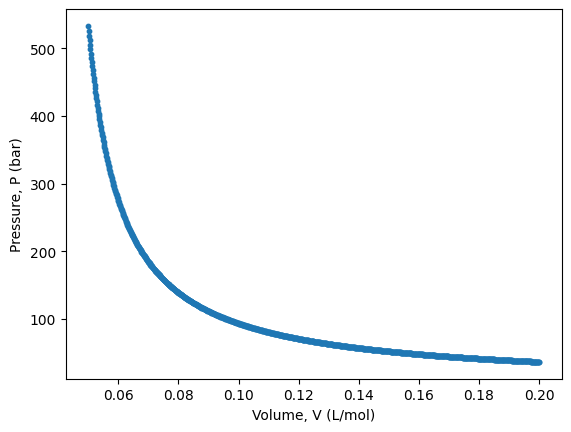

In [76]:
# code for plotting P state function
# The x-axis and y-axis must specify the name of the variables you are plotting. (marks will be deduced if you do not specify what variable is each axis)

T = 77.25
p = P_RK(v_grid, T)
plt.scatter(v_grid, p, s=10)
plt.xlabel('Volume, V (L/mol)')
plt.ylabel('Pressure, P (bar)')

## Q1.b [10 marks]
Compute the partial derivative of $P(V,T)$ with respect to $V$ at $T=77.25K$ using the following numerical approximation for the derivative. <br>
**Three-point forward difference formula:**
$$
\frac{\partial f}{\partial x} \approx \frac{-3 f(x) + 4f(x+h) - f(x+2h)}{2h}
$$
where $f(x)$ is the function you want to differentiate, $x$ is the variable, and $h$ is the step size.

1. Create a python function that computes the derivative of P with respect to V using the three-point forward difference.
2. Cerate a python function that computes the analytical derivative of P with respect to V.
3. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods. 
Compare your results with the analytical solution (extra exercise for your midterm).

Verify the output of any of both functions is the same size as the grid of the input.

From the fundamental equation of thermodynamics we can define the following equality, 
$$
\int_{P_1}^{P_2} V(P)\;dP = \int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV
$$

As you can see from this integral it is also necessary the computation of partial derivative of the state function P.


In [77]:
# [5 marks]
def three_point_differentiation(x, h):
    # code goes here
    T = 77.25
    dP = x.copy()
    for i in range(x.shape[0]):
        dPi = -3*P_RK(x[i], T) + 4*P_RK(x[i]+h, T) - P_RK(x[i] + 2*h, T)
        dP[i] = dPi
    return dP/(2*h)

Compute the analytical derivative of the Redlich–Kwong (RK) equation of state.
 [5 marks]

$$
\frac{\partial P(V_m,T)}{\partial V_m}
=\frac{\partial }{\partial V_m} \left ( \frac{RT}{V_m - b} - \frac{a}{\sqrt{T}\,V_m(V_m + b)}, \right ) 
$$ 

$$
\frac{\partial P}{\partial V_m}
= -\frac{RT}{(V_m - b)^2}
+ \frac{a(2V_m + b)}{\sqrt{T}\,[V_m(V_m + b)]^2}
$$

In [78]:
# partial derivative of P with respect to V at constant T
def dP_RK_dVm(Vm, T):
    # code goes here
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol

    dP = -(R * T) / (Vm - b)**2 + (a * (2*Vm + b)) / (np.sqrt(T) * (Vm * (Vm + b))**2)

    return dP

The value the square norm of the difference of the derivative compute with three-point forward difference and the analytical derivative, 
$$
F(\mathbf{y}, \mathbf{\hat{y}}) = \| \mathbf{y}- \mathbf{\hat{y}} \|_2  = \frac{1}{N}\sum_{i=1}^N \left(y_i - \hat{y}_i \right)^2,
$$
where 
1. $y_i$ is the predicted value, in this case, $\frac{\partial  P(V_m,T)}{\partial V_m}|_{V_{m_i}}$
2. $\hat{y}_i$ is the analytical value of $\frac{\partial  P(V_m,T)}{\partial V_m}|_{V_{m_i}}$
3. $N$ is the total number of elements in $\mathbf{y}$.


In [79]:
def f_square_norm(y, y_hat): # [5 marks]
    # code here
    error = np.sum((y - y_hat)**2)
    N = y.shape[0]
    error = error / N
    return error

In [80]:
h = v_grid[1] - v_grid[0]
dP_numeric = three_point_differentiation(v_grid, h)
dP_analytical = dP_RK_dVm(v_grid, T)

square_norm = f_square_norm(dP_numeric, dP_analytical)
print(f'The square norm is {square_norm:.3f}')

The square norm is 3.297


## Q1.c numerical integration

In class we saw that the integral of a function can be approximated using the sum of the integrand.<br>
**Composite Three-Point Trapezoidal Rule:**
For a uniform grid where $h$ is the spacing between consecutive points, the composite three-point trapezoidal rule can be written as,
$$
\int_{a}^{b} f(x) dx = \frac{h}{4} \sum_{i=0}^{N-3} \left (f(x_i) + 2f(x_{i+1}) + f(x_{i+2}) \right )
$$
where $N$ is the number of grid points. 

1. Create a python function for the three-point trapezoidal rule for numerical integration.
2. Cerate a python function that computes the analytical integration of $\int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV$ for different values of $V_1$ and $V_2$ and T.
3. Compare your three-point trapezoidal rule function for this example with the analytical number.
4. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods. 
Compare your results with the analytical solution (extra exercise for your midterm).

In [92]:
def three_point_trapezoidal_rule(x, h): # [10 marks]
    # code here
    T = 77.25
    # f = P_RK(x, T)
    f = dP_RK_dVm(x, T)  # evaluate the function dP_RK_dVm at each point in x
    N = x.shape[0]
    integral = 0
    for i in range(N-3):
        integral += (f[i] + 2*f[i+1] + f[i+2])

    integral = (h/4.) * integral
    return integral

Compute the analytical integral of 
$$
\int_{V_1}^{V_2} \left (\frac{\partial P_{RK}(V,T)}{\partial V} \right )_{T}dV
$$
for convenience $V$ is $V_m$. 

The above integral, once evaluated can be defined in terms of the antiderivative $F$,
$$
\int_{V_1}^{V_2} \left (\frac{\partial P_{RK}(V,T)}{\partial V} \right )_{T}dV = F(V_2) - F(V_1)
$$

$$
\int_{V_1}^{V_2} \left (\frac{\partial P_{RK}(V,T)}{\partial V} \right )_{T}dV = 
$$



In [93]:
# function that computes the analytical integral of int V (dP/dV)_T
def analytical_integral(V1, V2): # [5 marks]

    # code here
    T = 77.25 # K
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol

    def f_antiderivative(Vi):
        #code here
        sqrt_T = np.sqrt(T)

        term1 = R * T/ (Vi - b)
        term2 = - a / (sqrt_T * Vi * (Vi + b))

        return term1 + term2

    integral = f_antiderivative(V2) - f_antiderivative(V1)
    return integral

# Compare analytic integration vs numerical integration.
1. What is the error for an integration grid with 100 points? [2 marks]
2. Generate a ``nice'' plot to showcase the convergence of the numerical integral as a function of the number of grid points. [5 marks]

In [98]:

# Generate a grid for Vm (Volume per mole)
v_min = 0.05  # L/mol
v_max = 0.2  # L/mol
n_points = 100
v_grid = np.linspace(v_min, v_max, n_points)

h = v_grid[1] - v_grid[0]
int_numeric = three_point_trapezoidal_rule(v_grid, h)
print(f'Integral 3-point : {int_numeric:.4f}, N: {n_points}')

int_analytic = analytical_integral(v_min, v_max)
print(f'Integral analytic : {int_analytic:.4f}')

Integral 3-point : -464.5567, N: 100
Integral analytic : -496.4273


In [ ]:
# plot the accuracy of the integral convergence here [5 marks]



# Q3 Molecular similarity function

Later in class we will see that a molecule can be represented numerically using a **finger prints** representation. This numerical vector is used describe each individual molecule,
for example for the molecule of caffeine, 


In [85]:
def get_fingerprints(m_smiles, radius=2, nbits=1024):
  m = AllChem.MolFromSmiles(m_smiles)
  m = AllChem.AddHs(m)
  m_fingerprints = AllChem.GetMorganFingerprintAsBitVect(
      m, radius=radius, nBits=nbits)
  return np.asarray(m_fingerprints)

Caffeine fingerprints:
[0 0 0 ... 0 0 0]


[20:47:53] DEPRECATION WARNING: please use MorganGenerator


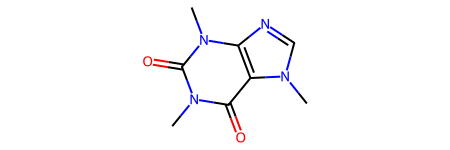

In [86]:
# caffeine molecule
smiles_caff = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
# get the fingerprint representation of caffeine molecule
x_caff = get_fingerprints(smiles_caff)

print("Caffeine fingerprints:")
print(x_caff) #not all are zeros


# template for plotting the molecule
mol = AllChem.MolFromSmiles(smiles_caff)
mol

[20:47:53] DEPRECATION WARNING: please use MorganGenerator


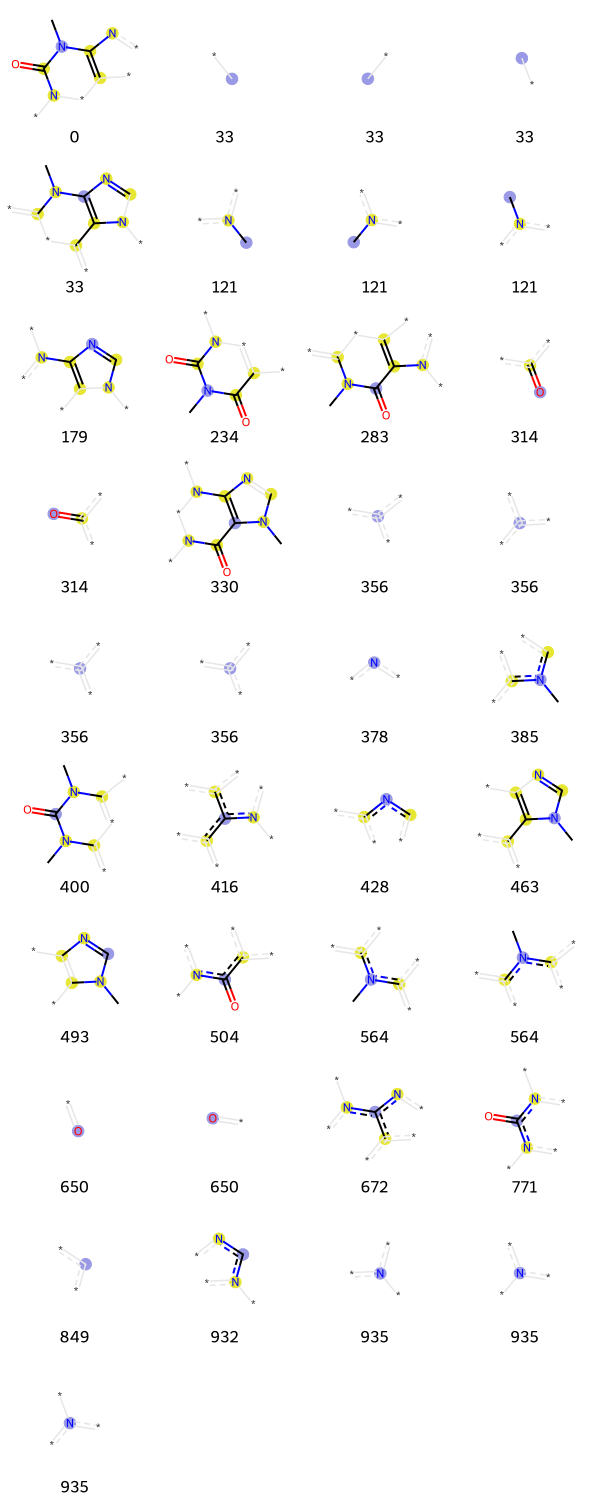

In [87]:
list_bits = []
bi = {}
legends = []
fp = AllChem.GetMorganFingerprintAsBitVect(
    mol, radius=2, nBits=1024, bitInfo=bi)
for x in fp.GetOnBits():
    for i in range(len(bi[x])):
        list_bits.append((mol, x, bi, i))
        legends.append(str(x))
Draw.DrawMorganBits(list_bits, molsPerRow=4, legends=legends)   


In [88]:
# you can check that some of above bits (e.g., 650, 935) are set to 1
print(x_caff[935])
print(x_caff[650])
print(x_caff[651]) # equal to zero

1
1
0


Now, suppose you have a database of 5,000 molecules.<br>
To find the similarity of the caffeine molecule with the database. <br>
You would calculate the **Dice similarity** (DS) between each molecule in the database and the caffeine molecule.<br>


**Dice similarity**
$$
DS(\mathbf{x}, \mathbf{x}') = \frac{2\mathbf{x}^\top\mathbf{x}'}{\|\mathbf{x}\|^2 + \|\mathbf{x}'\|^2},
$$
where
* $\mathbf{x}$ is the fingerprint representation of a molecule, $\mathbf{x} = [0,1,0,\cdots]$ 
* $\mathbf{x}^\top\mathbf{x}'$ is the dot product between two molecules' fingerprint representation
  $$
    \mathbf{x}^\top\mathbf{x}' = \sum_{i=1}^N x_i * x'_i
  $$
* $\|\mathbf{x}\|^2$ is the square norm of the fingerprint representation; $\|\mathbf{x}\|^2 = \sum_i^n x_i^2$

1. Two structures are usually considered similar if $DS > 0.85$.
From the database, how many molecules are similar to the caffeine molecule?
1. Plot a histogram of the  similarity between each molecule in the database and the caffeine molecule. The histogram must have 200 bins.
2. What is the less similar molecule to caffeine.
3. What is the average  similarity between each molecule in the database and caffeine? 

In [89]:
def dice_similarity(fp_molecule1, fp_molecule2): # [10 marks]
    # code here to calculate the Tanimoto similarity

    x = fp_molecule1
    xp = fp_molecule2

    x_norm = x@x
    xp_norm = xp@xp
    dot_product = x@xp

    value = 2* dot_product / (x_norm + xp_norm)
    return value

In [90]:
# load the database
data_file = 'https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Assignments/solubility.csv'
data = pd.read_csv(data_file)
data = data['SMILES']
print('Total data points: ', len(data))

Total data points:  9982


In [91]:
# note you will get an error that says 
# DEPRECATION WARNING: please use MorganGenerator, do not worry!

# vector to store the similarity between data and caffeine
similarities = np.zeros(len(data))
for i, si in enumerate(data):
    # get the fingerprint representation of each molecule in the database
    x_i = get_fingerprints(si)

    # calculate the Dice similarity between the caffeine molecule and each molecule in the database
    ts_i = dice_similarity(x_i, x_caff)

    # add the similarity to a list
    similarities[i] = ts_i

[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerator
[20:47:54] DEPRECATION WARNING: please use MorganGenerat

KeyboardInterrupt: 

In [ ]:
i0 = np.where(similarities > 0.85)
print('Number of similar molecules: ', len(i0[0]))

Number of similar molecules:  1


Text(0.5, 0, 'Dice Similarity')

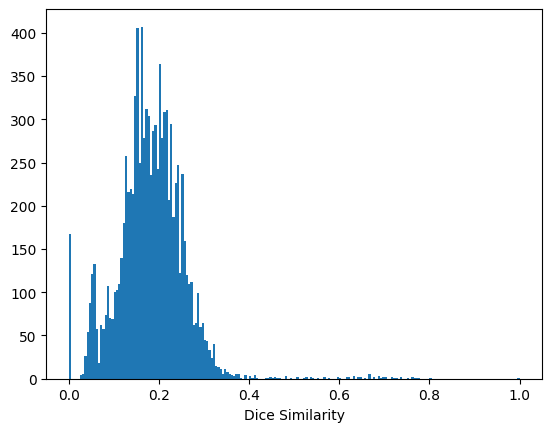

In [ ]:
# plot the histogram of the Tanimoto similarity here [5 marks if runs]
# make the necessary adjustments to make the plot prettier

plt.hist(similarities, bins=200)
plt.xlabel('Dice Similarity')